# Predicting Car Accidents - Capstone

## Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Opening the CSV


In [4]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Gathering information about attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Hugely unbalanced data

In [7]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [9]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [10]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

## In order to fix the imbalance, we will downsample the data to the lower limit

In [11]:
from sklearn.utils import resample

df_maj = df[df['SEVERITYCODE'] == 1]
df_min = df[df['SEVERITYCODE'] == 2]

df_sample = resample(df_maj, replace= False, n_samples=58188, random_state = 1)
df = pd.concat([df_sample,df_min])


In [12]:
df['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [21]:
# WE CAN SEE WEATHER, ROADCOND, LIGHTCOND ARE OBJECTS, LETS CHANGE THEIR TYPE!
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

## Converting Datatypes of WEATHER, ROADCOND, LIGHTCOND

In [22]:
# CONVERT FROM OBJECTS TO CATEGORICAL VARIABLE

df = df.astype({"WEATHER":'category', "ROADCOND":'category', "LIGHTCOND":'category'})
df.dtypes

SEVERITYCODE         int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE.1       int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER           category
ROADCOND          category
LIGHTCOND         category
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
H

## Encoding the labels using cat.codes

In [46]:
df["WEATHER_C"] = df["WEATHER"].cat.codes
df["ROADCOND_C"] = df["ROADCOND"].cat.codes
df["LIGHTCOND_C"] = df["LIGHTCOND"].cat.codes
Feature = df[['WEATHER','ROADCOND','LIGHTCOND','WEATHER_C','ROADCOND_C','LIGHTCOND_C']]
X = np.asarray(Feature[['WEATHER_C','ROADCOND_C','LIGHTCOND_C']])
print(X[0:])

y = df['SEVERITYCODE'].values
print(y[0:])
Feature.head()

[[1 0 5]
 [1 0 2]
 [1 0 5]
 ...
 [1 0 5]
 [1 0 5]
 [1 0 6]]
[1 1 1 ... 2 2 2]


,WEATHER,ROADCOND,LIGHTCOND,WEATHER_C,ROADCOND_C,LIGHTCOND_C
88984,Clear,Dry,Daylight,1,0,5
166664,Clear,Dry,Dark - Street Lights On,1,0,2
53641,Clear,Dry,Daylight,1,0,5
123636,Overcast,Dry,Dark - Street Lights On,4,0,2
171163,Raining,Wet,Daylight,6,8,5


## Normalizing Data

In [26]:

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

C:\Users\nonu4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\nonu4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Test set shape: ', X_test.shape, y_test.shape)
print('Training set shape: ', X_train.shape, y_train.shape)

Test set shape:  (34913, 3) (34913,)
Training set shape:  (81463, 3) (81463,)


# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier as knn

accuracy = []
#Train Model and Predict  
for i in range(15,25):
    model = knn(i)
    model.fit(X_train, y_train)
    accuracy.append(model.predict(X_test))

for i in range(len(accuracy)):
    print(f"For k = {i+1} Score = {accuracy[i]}")
    

For k = 1 Score = [1 1 1 ... 1 1 1]
For k = 2 Score = [1 1 1 ... 1 1 1]
For k = 3 Score = [1 1 1 ... 1 1 1]
For k = 4 Score = [1 1 1 ... 1 1 1]
For k = 5 Score = [2 2 1 ... 1 2 1]
For k = 6 Score = [2 2 1 ... 1 2 1]
For k = 7 Score = [2 2 1 ... 1 2 1]
For k = 8 Score = [2 2 1 ... 1 2 1]
For k = 9 Score = [2 2 1 ... 1 2 1]
For k = 10 Score = [2 2 1 ... 1 2 1]


In [35]:
#FOR K = 24
model = knn(24)
model.fit(X_train, y_train)
accuracy = model.predict(X_test)
from sklearn.metrics import f1_score, jaccard_similarity_score, log_loss
print("F1-Score of KNN is : ", f1_score(y_test, accuracy, average='macro'))
print("Jaccard Score of KNN is : ", jaccard_similarity_score(y_test, accuracy))

F1-Score of KNN is :  0.5427680932865123
Jaccard Score of KNN is :  0.5434078996362387


# DECISION  TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dt.fit(X_train, y_train)
pt = dt.predict(X_test)


In [37]:
print("F1-Score of Decision Tree is : ", f1_score(y_test, pt, average='macro'))
print("Jaccard Score of Decision Tree is : ", jaccard_similarity_score(y_test, pt))

F1-Score of Decision Tree is :  0.5366857298388111
Jaccard Score of Decision Tree is :  0.5590467734081861


# LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LRpred = LR.predict(X_test)
LRprob = LR.predict_proba(X_test)

In [40]:
print("F1-Score of Logistic Regression is : ", f1_score(y_test, LRpred, average='macro'))
print("Jaccard Score of Logistic Regression is : ", jaccard_similarity_score(y_test, LRpred))
print("LogLoss of Logistic Regression is : ", log_loss(y_test, LRprob))

F1-Score of Logistic Regression is :  0.5122582306973823
Jaccard Score of Logistic Regression is :  0.5269383897115688
LogLoss of Logistic Regression is :  0.6846604312217874


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 6170 11254]
 [ 5262 12227]]


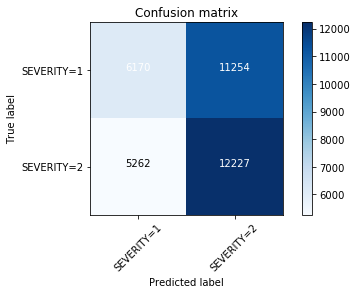

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LRpred, labels=[1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITY=1','SEVERITY=2'],normalize= False,  title='Confusion matrix')

In [62]:
df2 = pd.DataFrame(np.array([[0.54,0.53,0.51],[0.54,0.55,0.52],['NA','NA',0.68]]), columns=['KNN','DECISION TREE','LOGISTIC REGRESSION'])
df2.index=['F1','JACCARD', 'LOGLOSS']
df2

,KNN,DECISION TREE,LOGISTIC REGRESSION
F1,0.54,0.53,0.51
JACCARD,0.54,0.55,0.52
LOGLOSS,NA,NA,0.68


In [52]:
df2 = pd.DataFrame(np.array([[1, 2, 3], ['a', 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,a,5,6
2,7,8,9
